# d读取数据。以“豆瓣评分”为标准，看看电影评分及分布，及烂片的情况

In [1]:
import pandas as pd
import numpy as np
import warnings
#忽略警告
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("moviedata.xlsx")
data.head(5)

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
0,坏孩子的秋天,263.0,7.5,暂无,肖政 / 施大生 / 贾媛媛 / 王静,中国大陆,NaN,邓科,90,剧情 / 儿童,陆长河,汉语普通话,0.220,0.424,0.280,0.059,0.017
1,黑猫大旅社 黑貓大旅社,514.0,6.8,不详,陆奕静 / 老鄧 （夏靖庭 ） / 蔡振南,台湾,Hotel Black Cat,徐丽雯,112,剧情,徐丽雯,台湾国语,0.102,0.332,0.453,0.091,0.022
2,追捕,NaN,NaN,2018-02(香港),张涵予 / 戚薇 / 福山雅治 / 河智苑 / 国村隼 / 池内博之 / 樱庭奈奈美 / ...,香港,Manhunt,吴宇森,NaN,剧情 / 动作,吴宇森 / 阮世生 / 西村寿行,NaN,0.000,0.000,0.000,0.000,0.000
3,无问西东,NaN,NaN,2018(中国大陆),章子怡 / 张震 / 黄晓明 / 王力宏 / 陈楚生 / 韩童生 / 王盛德 / 姚晨 /...,中国大陆,Forever Young,李芳芳,NaN,剧情 / 爱情 / 战争,李芳芳,汉语普通话,0.000,0.000,0.000,0.000,0.000
4,绣春刀II：修罗战场,NaN,NaN,2017-07(中国大陆),张震 / 杨幂 / 张译 / 雷佳音 / 辛芷蕾 / 李媛,中国大陆,绣春刀前传 / 绣春刀：修罗场 / 绣春刀2：修罗战场,路阳,NaN,动作 / 武侠 / 古装,陈舒,汉语普通话,0.000,0.000,0.000,0.000,0.000


# 2.1 查看“豆瓣评分”分布情况，绘制直方图和箱型图

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
# data.set_index("电影名称",inplace=True)
# data.head(5)

In [5]:
data2=data.dropna(subset=["豆瓣评分"],axis=0)

<Figure size 864x576 with 0 Axes>

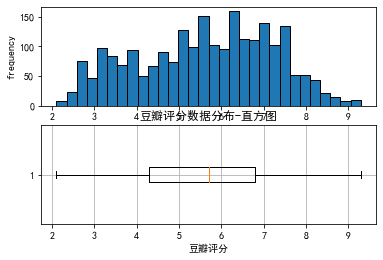

In [6]:
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False 
plt.figure(figsize=(12,8))
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
ax1.hist(data2["豆瓣评分"],edgecolor='black',bins=30)
ax1.set_ylabel("frequency")
ax2.boxplot(data2["豆瓣评分"],vert=False)
plt.grid()
plt.xlabel('豆瓣评分')
plt.title('豆瓣评分数据分布-直方图')
plt.show()

# 判断烂片标准，这里以上四分位数评分为“烂片标准”
# 筛选出烂片数据，并做排名，找到top20

In [7]:
data.sort_values(by="豆瓣评分",inplace=True,ascending=True)
data.head(5)

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
60,渡灵人,176.0,2.1,2016-07-04(中国大陆),王磊 / 邱佩霞 / 杜冯欣怡 / 郑礼宇,中国大陆,NaN,孔令杭,63分钟,剧情,樊聪,汉语普通话,0.000,0.000,0.024,0.000,0.976
239,白日杀机,131.0,2.2,2015-08-10,张小仟 / 章宇 / 郑诺 / 亦涵,中国大陆,NaN,张帆,62分钟,恐怖,NaN,汉语普通话,0.000,0.000,0.011,0.055,0.934
1161,大震撼,210.0,2.2,2011-05-19(中国大陆),石小群 / 宫哲 / 徐爽 / 齐如意 / 姚心蕊 / 崔可法 / 卢彦西,中国大陆,NaN,崔立新,NaN,剧情,NaN,汉语普通话,0.014,0.000,0.000,0.023,0.963
966,戚继光英雄传,794.0,2.2,2012-06-01(中国大陆),NaN,中国大陆,The Legend of The Hero,姚林 / 杨清峰 / 吴鲁光 / 沈丹冶,90分钟,剧情 / 动画 / 传记 / 历史,符利群,汉语普通话,0.027,0.000,0.002,0.004,0.967
125,皇帝的新装之圣诞大明星,114.0,2.3,2016-01-01(中国大陆),NaN,中国大陆,The Emperor’s New Clothes,李霞,78分钟,喜剧 / 动画,NaN,汉语普通话,0.000,0.014,0.029,0.043,0.913


In [8]:
data3=data.describe()
data3
#查找上四分位数

,豆瓣评论数,豆瓣评分,r5,r4,r3,r2,r1
count,2306.000000,2306.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000
mean,7980.364267,5.604250,0.091358,0.186481,0.301182,0.164534,0.194977
std,24061.956144,1.595514,0.100455,0.159409,0.168219,0.113313,0.240013
min,25.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,174.250000,4.300000,0.028000,0.043000,0.160000,0.064000,0.017000
50%,620.000000,5.700000,0.056000,0.147000,0.322000,0.157000,0.077000
75%,3276.250000,6.800000,0.120000,0.311000,0.438000,0.256000,0.308000
max,310868.000000,9.300000,0.750000,0.682000,0.750000,0.500000,0.976000


In [9]:
data3.loc["25%","豆瓣评分"]

4.3

In [10]:
lanpian_top20=data[data["豆瓣评分"]<data3.loc["25%","豆瓣评分"]][["电影名称","豆瓣评分","导演","主演"]][:20]

In [11]:
lanpian_top20.head(20)
#筛选出烂片前20的数据

,电影名称,豆瓣评分,导演,主演
60,渡灵人,2.1,孔令杭,王磊 / 邱佩霞 / 杜冯欣怡 / 郑礼宇
239,白日杀机,2.2,张帆,张小仟 / 章宇 / 郑诺 / 亦涵
1161,大震撼,2.2,崔立新,石小群 / 宫哲 / 徐爽 / 齐如意 / 姚心蕊 / 崔可法 / 卢彦西
966,戚继光英雄传,2.2,姚林 / 杨清峰 / 吴鲁光 / 沈丹冶,NaN
125,皇帝的新装之圣诞大明星,2.3,李霞,NaN
1155,B区32号,2.3,吕建民,邓紫衣 / 唐宸禹 / 李锐
375,找个高富帅？,2.3,陈童,徐申东 / 张惠鑫 / 曲昱曈 / 王乐天 / 王妍 / 闫美伊 / 陈童 / 李飞
2357,换脸新娘,2.3,林云翔,翟文斌 / 吴菲 / 褚颖颖 / 林娜
67,不死之身,2.4,邵传勇,吴启华 / 吕颂贤 / 邵传勇
2443,笔仙归来,2.4,南鑫,程爽 / 赵若辰 / 王春成


In [12]:
lanpian_top20.replace(to_replace=np.NAN,value="无",inplace=True)

# 2.2 什么题材烂片最多

# 2.21
# -按照“类型字段”分类，筛选不同电影属于什么题材
# -整理数据，按照“题材”汇总，查看不同题材的烂片比例，并选top20

In [13]:
data.isnull().sum()
#发现在总的data里类型这个字段有空值，

电影名称         0
豆瓣评论数      151
豆瓣评分       151
上映日期       350
主演         113
制片国家/地区      0
又名         592
导演          30
片长         545
类型         226
编剧         350
语言          33
r5           0
r4           0
r3           0
r2           0
r1           0
dtype: int64

In [14]:
data3=data.dropna(subset=["类型","豆瓣评分"],axis=0)
#删除类型和豆瓣评分字段空值的数据

In [15]:
ty=[]
types=list(data3["类型"])
for word in types:
    words=word.split("/")#以/分割字符串
    ty.append(words)
#将类型字段提取出来，一个电影有可能符合多种类型
new_types=[j for i in ty for j in i]
new_types2=[]
for word in new_types:
    word2=word.replace(" ","")
    new_types2.append(word2)
#删除空格字符
new_type_movie=[]
for x in new_types2:
    if x not in new_type_movie:
        new_type_movie.append(x)
print(new_type_movie)
#获取不同重复电影类型的名称

['剧情', '恐怖', '动画', '传记', '历史', '喜剧', '惊悚', '爱情', '短片', '奇幻', '悬疑', '战争', '家庭', '科幻', '儿童', '鬼怪', '动作', '冒险', '情色', '音乐', '武侠', '古装', '犯罪', '运动', '歌舞', '戏曲', '同性', '黑色电影', '灾难', '纪录片', '真人秀', '西部', '舞台艺术', 'News', '脱口秀']


In [16]:
nums=[]
percentages=[]
for word in new_type_movie:
    lan_num=len(data3[(data3["类型"].str.contains(word))&(data3["豆瓣评分"]<4.3)])#同一种类型，烂片的个数
    num=len(data3[data3["类型"].str.contains(word)])
    print("在'{}'这个类型下烂片的个数为{}".format(word,lan_num))
    percentage=round(lan_num*100/num,2)
    print("在'{}'这个类型下烂片的比例为{}%".format(word,percentage))
    nums.append(num)
    percentages.append(percentage)


在'剧情'这个类型下烂片的个数为142
在'剧情'这个类型下烂片的比例为14.61%
在'恐怖'这个类型下烂片的个数为40
在'恐怖'这个类型下烂片的比例为57.97%
在'动画'这个类型下烂片的个数为28
在'动画'这个类型下烂片的比例为24.14%
在'传记'这个类型下烂片的个数为4
在'传记'这个类型下烂片的比例为10.26%
在'历史'这个类型下烂片的个数为9
在'历史'这个类型下烂片的比例为13.24%
在'喜剧'这个类型下烂片的个数为196
在'喜剧'这个类型下烂片的比例为34.15%
在'惊悚'这个类型下烂片的个数为109
在'惊悚'这个类型下烂片的比例为56.19%
在'爱情'这个类型下烂片的个数为181
在'爱情'这个类型下烂片的比例为32.91%
在'短片'这个类型下烂片的个数为6
在'短片'这个类型下烂片的比例为4.8%
在'奇幻'这个类型下烂片的个数为29
在'奇幻'这个类型下烂片的比例为34.52%
在'悬疑'这个类型下烂片的个数为88
在'悬疑'这个类型下烂片的比例为40.74%
在'战争'这个类型下烂片的个数为12
在'战争'这个类型下烂片的比例为17.65%
在'家庭'这个类型下烂片的个数为10
在'家庭'这个类型下烂片的比例为11.24%
在'科幻'这个类型下烂片的个数为10
在'科幻'这个类型下烂片的比例为37.04%
在'儿童'这个类型下烂片的个数为16
在'儿童'这个类型下烂片的比例为27.12%
在'鬼怪'这个类型下烂片的个数为1
在'鬼怪'这个类型下烂片的比例为33.33%
在'动作'这个类型下烂片的个数为77
在'动作'这个类型下烂片的比例为25.08%
在'冒险'这个类型下烂片的个数为32
在'冒险'这个类型下烂片的比例为37.65%
在'情色'这个类型下烂片的个数为8
在'情色'这个类型下烂片的比例为66.67%
在'音乐'这个类型下烂片的个数为5
在'音乐'这个类型下烂片的比例为17.24%
在'武侠'这个类型下烂片的个数为5
在'武侠'这个类型下烂片的比例为8.47%
在'古装'这个类型下烂片的个数为22
在'古装'这个类型下烂片的比例为17.05%
在'犯罪'这个类型下烂片的个数为21
在'犯罪'这个类型下烂片的比例为20.19%
在'运动'这个类型下烂片的个数为1
在'运动'这个类型下烂片的比例为9.09%


In [17]:
data4={"type_lp_pre":percentages,"typecount":nums,"typename":new_type_movie}

In [18]:
lan_type_percent=pd.DataFrame(data4)

In [19]:
lan_type_percents=lan_type_percent.sort_values(by="type_lp_pre",axis=0,ascending=False)
#将烂片比例排序

In [20]:
lan_type_percent_20=lan_type_percents[:20]
lan_type_percent_20
#获得前20的烂片的类型数据

,type_lp_pre,typecount,typename
18,66.67,12,情色
1,57.97,69,恐怖
6,56.19,194,惊悚
10,40.74,216,悬疑
28,40.00,10,灾难
17,37.65,85,冒险
13,37.04,27,科幻
9,34.52,84,奇幻
5,34.15,574,喜剧
15,33.33,3,鬼怪


# 2.3 和什么国家合拍更容易产生烂片

In [21]:
data.isnull().sum()
#发现国家地区部分并没有空值

电影名称         0
豆瓣评论数      151
豆瓣评分       151
上映日期       350
主演         113
制片国家/地区      0
又名         592
导演          30
片长         545
类型         226
编剧         350
语言          33
r5           0
r4           0
r3           0
r2           0
r1           0
dtype: int64

In [22]:
new_data=data.dropna(subset=["豆瓣评分"],axis=0)
#删除豆瓣评分字段空值的数据

In [23]:
country=new_data[new_data["制片国家/地区"].str.contains("中国大陆")]
country.head(20)
#筛选掉制片/地区不包含年中国大陆的数据

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
60,渡灵人,176.0,2.1,2016-07-04(中国大陆),王磊 / 邱佩霞 / 杜冯欣怡 / 郑礼宇,中国大陆,NaN,孔令杭,63分钟,剧情,樊聪,汉语普通话,0.000,0.000,0.024,0.000,0.976
239,白日杀机,131.0,2.2,2015-08-10,张小仟 / 章宇 / 郑诺 / 亦涵,中国大陆,NaN,张帆,62分钟,恐怖,NaN,汉语普通话,0.000,0.000,0.011,0.055,0.934
1161,大震撼,210.0,2.2,2011-05-19(中国大陆),石小群 / 宫哲 / 徐爽 / 齐如意 / 姚心蕊 / 崔可法 / 卢彦西,中国大陆,NaN,崔立新,NaN,剧情,NaN,汉语普通话,0.014,0.000,0.000,0.023,0.963
966,戚继光英雄传,794.0,2.2,2012-06-01(中国大陆),NaN,中国大陆,The Legend of The Hero,姚林 / 杨清峰 / 吴鲁光 / 沈丹冶,90分钟,剧情 / 动画 / 传记 / 历史,符利群,汉语普通话,0.027,0.000,0.002,0.004,0.967
125,皇帝的新装之圣诞大明星,114.0,2.3,2016-01-01(中国大陆),NaN,中国大陆,The Emperor’s New Clothes,李霞,78分钟,喜剧 / 动画,NaN,汉语普通话,0.000,0.014,0.029,0.043,0.913
1155,B区32号,5331.0,2.3,2011-06-03(中国大陆),邓紫衣 / 唐宸禹 / 李锐,中国大陆,"No. 32, B District",吕建民,89分钟,剧情 / 惊悚 / 恐怖,张二,汉语普通话,0.021,0.004,0.011,0.045,0.918
375,找个高富帅？,659.0,2.3,2015-01-16(中国大陆),徐申东 / 张惠鑫 / 曲昱曈 / 王乐天 / 王妍 / 闫美伊 / 陈童 / 李飞,中国大陆,找个高富帅 / 谈婚论嫁18天 / Who's the One,陈童,90分钟,喜剧 / 爱情,陈童 / 张惠鑫,汉语普通话,0.023,0.000,0.014,0.050,0.913
2357,换脸新娘,93.0,2.3,NaN,翟文斌 / 吴菲 / 褚颖颖 / 林娜,中国大陆,NaN,林云翔,NaN,爱情 / 短片,于正,汉语普通话,0.016,0.000,0.032,0.032,0.919
67,不死之身,204.0,2.4,2016-06-28,吴启华 / 吕颂贤 / 邵传勇,中国大陆,盗墓笔记2016,邵传勇,81分钟,剧情 / 爱情 / 奇幻,彭燕雯,汉语普通话,0.037,0.000,0.007,0.030,0.925
2443,笔仙归来,188.0,2.4,NaN,程爽 / 赵若辰 / 王春成,中国大陆,NaN,南鑫,61分钟,恐怖,NaN,汉语普通话,0.016,0.000,0.048,0.056,0.880


In [24]:
a=list(country["制片国家/地区"])

In [25]:
con=[]
for word in a:
    words=word.split("/")
    con.append(words)
#将国家字段提取出来，一个电影有多个国家一起参与拍摄

In [26]:
new_con=[j for i in con for j in i]#将列表里的多个列表里的数据合并到一个列表里
new_con2=[]
for word in new_con:
    word2=word.replace(" ","")
    new_con2.append(word2)
#删除空格字符

In [27]:
new_con_movie=[]
for x in new_con2:
    if x not in new_con_movie:
        new_con_movie.append(x)
print(new_con_movie)
#获取不同重复拍摄和制片国家的名称

['中国大陆', '台湾', '香港', '日本', '马来西亚', '英国', '美国', '新西兰', '韩国', '德国', '法国', '西班牙', '比利时', '泰国', '朝鲜', '新加坡', '加拿大', '澳大利亚', '俄罗斯', '卢森堡', '印度', '蒙古国', 'Malaysia', '以色列', '中国', '南非', '丹麦']


In [28]:
new_con_movie.remove('台湾')
new_con_movie.remove('香港')
new_con_movie.remove('中国大陆')
new_con_movie.remove('中国')
#因为之前已经筛选出带有中国大陆的的字段了，这里找的是和中国合拍的国家，应该删除台湾和香港之类的噪音数据

In [29]:
loc_nums=[]
loc_percentages=[]
for word in new_con_movie:
    lan_loc_num=len(country[(country["制片国家/地区"].str.contains(word))&(country["豆瓣评分"]<4.3)])#同一个国家分类，烂片的个数
    loc_num=len(country[country["制片国家/地区"].str.contains(word)])
    print("'{}'拍的烂片的个数为{}".format(word,lan_loc_num))
    loc_percentage=round(lan_loc_num*100/loc_num,2)
    print("'{}'拍的下烂片的比例为{}%".format(word,loc_percentage))
    loc_nums.append(loc_num)
    loc_percentages.append(loc_percentage)

'日本'拍的烂片的个数为1
'日本'拍的下烂片的比例为7.14%
'马来西亚'拍的烂片的个数为1
'马来西亚'拍的下烂片的比例为50.0%
'英国'拍的烂片的个数为3
'英国'拍的下烂片的比例为75.0%
'美国'拍的烂片的个数为7
'美国'拍的下烂片的比例为33.33%
'新西兰'拍的烂片的个数为1
'新西兰'拍的下烂片的比例为100.0%
'韩国'拍的烂片的个数为3
'韩国'拍的下烂片的比例为15.79%
'德国'拍的烂片的个数为1
'德国'拍的下烂片的比例为25.0%
'法国'拍的烂片的个数为1
'法国'拍的下烂片的比例为10.0%
'西班牙'拍的烂片的个数为1
'西班牙'拍的下烂片的比例为100.0%
'比利时'拍的烂片的个数为1
'比利时'拍的下烂片的比例为50.0%
'泰国'拍的烂片的个数为1
'泰国'拍的下烂片的比例为50.0%
'朝鲜'拍的烂片的个数为1
'朝鲜'拍的下烂片的比例为100.0%
'新加坡'拍的烂片的个数为1
'新加坡'拍的下烂片的比例为33.33%
'加拿大'拍的烂片的个数为0
'加拿大'拍的下烂片的比例为0.0%
'澳大利亚'拍的烂片的个数为0
'澳大利亚'拍的下烂片的比例为0.0%
'俄罗斯'拍的烂片的个数为0
'俄罗斯'拍的下烂片的比例为0.0%
'卢森堡'拍的烂片的个数为0
'卢森堡'拍的下烂片的比例为0.0%
'印度'拍的烂片的个数为0
'印度'拍的下烂片的比例为0.0%
'蒙古国'拍的烂片的个数为0
'蒙古国'拍的下烂片的比例为0.0%
'Malaysia'拍的烂片的个数为0
'Malaysia'拍的下烂片的比例为0.0%
'以色列'拍的烂片的个数为0
'以色列'拍的下烂片的比例为0.0%
'南非'拍的烂片的个数为0
'南非'拍的下烂片的比例为0.0%
'丹麦'拍的烂片的个数为0
'丹麦'拍的下烂片的比例为0.0%


In [30]:
data5={"loc":new_con_movie,"loc_lp_pre":loc_percentages,"loccount":loc_nums}

In [31]:
lan_loc_movie=pd.DataFrame(data5)
lan_loc_movies=lan_loc_movie.sort_values(by="loc_lp_pre",axis=0,ascending=False)

In [32]:
lan_loc_movies_more3=lan_loc_movies[lan_loc_movies["loccount"]>=3]
lan_loc_movies_more3

,loc,loc_lp_pre,loccount
2,英国,75.00,4
12,新加坡,33.33,3
3,美国,33.33,21
6,德国,25.00,4
5,韩国,15.79,19
7,法国,10.00,10
0,日本,7.14,14
13,加拿大,0.00,6
14,澳大利亚,0.00,3


# 2.4 卡司数量是否和烂片有关

In [33]:
data.isnull().sum()
#发现主演部分还是有空值

电影名称         0
豆瓣评论数      151
豆瓣评分       151
上映日期       350
主演         113
制片国家/地区      0
又名         592
导演          30
片长         545
类型         226
编剧         350
语言          33
r5           0
r4           0
r3           0
r2           0
r1           0
dtype: int64

In [34]:
data6=data.dropna(subset=["主演","豆瓣评分"],axis=0)
#删除主演和豆瓣评分字段空值的数据

In [35]:
people=list(data6["主演"])
people

[' 王磊 / 邱佩霞 / 杜冯欣怡 / 郑礼宇',
 ' 张小仟 / 章宇 / 郑诺 / 亦涵',
 ' 石小群 / 宫哲 / 徐爽 / 齐如意 / 姚心蕊 / 崔可法 / 卢彦西',
 ' 邓紫衣 / 唐宸禹 / 李锐',
 ' 徐申东 / 张惠鑫 / 曲昱曈 / 王乐天 / 王妍 / 闫美伊 / 陈童 / 李飞',
 ' 翟文斌 / 吴菲 / 褚颖颖 / 林娜',
 ' 吴启华 / 吕颂贤 / 邵传勇',
 ' 程爽 / 赵若辰 / 王春成',
 ' 古丽娜 / 曲国强 / 孙夕尧 / 严萌 / 陶玉洁 / 卢小璐 / 马一傲',
 ' 马诺 / 胡北 / 高森鹏 / 刘谋峰 / Edward Zee',
 ' 艾美琦 / 周柏豪  / 赵硕之 / 贾晓晨 / 陈百祥 / 罗家英 / 曹查理 / 戴梦梦 / 陈若岚 / 董敏莉 / 王合喜 / 黄嘉乐 / 梁焯满',
 ' 孙文婷',
 ' 万思维 / 唐国强 / 徐箭 / 巫刚 / 李幼斌 / 宋春丽 / 冯恩鹤 / 马晓伟 / 侯天来 / 刘继忠',
 ' 彭丹 / 任帅 / 姬他',
 ' 章小军 / 张希爱 / 慕钰华 / 姚红军 / 卢小璐 / 孙绽 / 邓杨宁 / 裴妤辰 / 林爱轩',
 ' 刘红韵 / 李旭乔 / 白文显 / 申克 / 宋磊 / 周岩 / 李思娴 / 张子焜 / 黎泰承 / 童雨欣',
 ' 叶艺城 / 温佳翼 / 马新皓 / 杜旭东 / 栗思涵',
 ' 苏菲 / 张乃歌 / 张慧雯',
 ' 刘波 / 腾飞 / 马瑞曼 / 谭皓 / 高天 / 聂琳峰',
 ' 殷果儿 / 姜文轩 / 苗青 / 刘力源 / 宋伟',
 ' 郑强 / 卢蒽洁 / 姜怡伊 / 陈伟栋 / 于朦胧 / 刘真佑 / 王岗 / 李耀景',
 ' 张达明 / 焦婷 / 胡桑',
 ' 田亮 / 颜微恩 / 元华 / 元秋 / 陈百祥 / 黎明 / 王翠玲',
 ' 彼得·斯特曼 / 玛丽亚·凯拉 / 杨丽菁 / 徐光宇  / 王双宝 / 彭波 / 张旭 / 曹艳 / 任泽巍',
 ' 胡家华 / 孙健淇 / 张江诗琴 / 种丹妮 / 温亚南 / 成泰燊 / 颜世魁',
 ' 杜海涛 / 沈梦辰 / 范军 / 柳英霞 / 计美臣',
 ' 王良 / 秦雪 / 洪辰 / 李蓓蕾 / 张国栋 / 谷鹏',
 '

In [36]:
people_num=[]
for word in people:
    words=word.split("/")
    people_num.append(words) 

In [37]:
people_nums=[]
for lis in people_num:
    people_nums.append(len(lis))    
# 计算每个电影的参演人数

In [38]:
data6['参演人数']=people_nums#将参演人数这个字段加到dataframe中

In [39]:
data6.head()

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1,参演人数
60,渡灵人,176.0,2.1,2016-07-04(中国大陆),王磊 / 邱佩霞 / 杜冯欣怡 / 郑礼宇,中国大陆,NaN,孔令杭,63分钟,剧情,樊聪,汉语普通话,0.000,0.000,0.024,0.000,0.976,4
239,白日杀机,131.0,2.2,2015-08-10,张小仟 / 章宇 / 郑诺 / 亦涵,中国大陆,NaN,张帆,62分钟,恐怖,NaN,汉语普通话,0.000,0.000,0.011,0.055,0.934,4
1161,大震撼,210.0,2.2,2011-05-19(中国大陆),石小群 / 宫哲 / 徐爽 / 齐如意 / 姚心蕊 / 崔可法 / 卢彦西,中国大陆,NaN,崔立新,NaN,剧情,NaN,汉语普通话,0.014,0.000,0.000,0.023,0.963,7
1155,B区32号,5331.0,2.3,2011-06-03(中国大陆),邓紫衣 / 唐宸禹 / 李锐,中国大陆,"No. 32, B District",吕建民,89分钟,剧情 / 惊悚 / 恐怖,张二,汉语普通话,0.021,0.004,0.011,0.045,0.918,3
375,找个高富帅？,659.0,2.3,2015-01-16(中国大陆),徐申东 / 张惠鑫 / 曲昱曈 / 王乐天 / 王妍 / 闫美伊 / 陈童 / 李飞,中国大陆,找个高富帅 / 谈婚论嫁18天 / Who's the One,陈童,90分钟,喜剧 / 爱情,陈童 / 张惠鑫,汉语普通话,0.023,0.000,0.014,0.050,0.913,8


In [40]:
people_num_group=[]
for number in list(data6["参演人数"]):
    if 1<=number<=2:
        people_num_group.append("1-2人")
    elif 3<=number<=4:
        people_num_group.append("3-4人")
    elif 5<=number<=6:
        people_num_group.append("5-6人")
    elif 7<=number<=9:
        people_num_group.append("7-9人")
    else:
        people_num_group.append("10人及以上")
data6["参演人数区间"]=people_num_group    
        

In [41]:
act_nums=[]
act_percentages=[]
lan_act_nums=[]
for word in list(data6["参演人数区间"].unique()):
    lan_act_num=len(data6[(data6["参演人数区间"].str.contains(word))&(data6["豆瓣评分"]<4.3)])#同一个参演人数的分类，烂片的个数
    act_num=len(data6[data6["参演人数区间"].str.contains(word)])
    print("这个'{}'参演人数区间内的烂片的个数为{}".format(word,lan_act_num))
    act_percentage=round(lan_act_num*100/act_num,2)
    print("这个'{}'参演人数区间内的烂片的比例为{}%".format(word,act_percentage))
    act_nums.append(act_num)
    act_percentages.append(act_percentage)
    lan_act_nums.append(lan_act_num)

这个'3-4人'参演人数区间内的烂片的个数为117
这个'3-4人'参演人数区间内的烂片的比例为17.97%
这个'7-9人'参演人数区间内的烂片的个数为157
这个'7-9人'参演人数区间内的烂片的比例为36.85%
这个'5-6人'参演人数区间内的烂片的个数为130
这个'5-6人'参演人数区间内的烂片的比例为27.9%
这个'10人及以上'参演人数区间内的烂片的个数为104
这个'10人及以上'参演人数区间内的烂片的比例为26.33%
这个'1-2人'参演人数区间内的烂片的个数为30
这个'1-2人'参演人数区间内的烂片的比例为10.99%


In [42]:
data7={"电影数量":act_nums,"烂片数量":lan_act_nums,"烂片比例":act_percentages}

In [43]:
lan_act_movie=pd.DataFrame(data7,index=list(data6["参演人数区间"].unique()))
lan_act_movie

,电影数量,烂片数量,烂片比例
3-4人,651,117,17.97
7-9人,426,157,36.85
5-6人,466,130,27.90
10人及以上,395,104,26.33
1-2人,273,30,10.99


# 2.5 不同导演每年的电影产量是怎样的

In [44]:
data.isnull().sum()
#查看空值的分布

电影名称         0
豆瓣评论数      151
豆瓣评分       151
上映日期       350
主演         113
制片国家/地区      0
又名         592
导演          30
片长         545
类型         226
编剧         350
语言          33
r5           0
r4           0
r3           0
r2           0
r1           0
dtype: int64

In [45]:
data8=data.dropna(subset=["上映日期"],axis=0)
#删除上映日期字段空值的数据

In [46]:
date=list(data8["上映日期"])

In [47]:
new_date=[]
for word in date:
    words=word.replace(" ","")[:4]
    new_date.append(words)  
data8["year"]=new_date

In [48]:
dates=[]
for x in new_date:
    if x not in dates:
        dates.append(x)
print(dates)
#获取不同重复的年份

['2016', '2015', '2011', '2012', '2014', '2007', '2013', '2010', '2008', '2009', '2004', '1988', '2005', '2006', '2001', '2002', '2000', '1979', '1998', '1997', '1994', '1980', '1995', '1991', '1978', '2003', '1964', '1984', '1974', '1985', '1963', '1986', '1981', '1996', '1968', '1983', '1989', '2017', '1965', '1973', '1990', '1987', '不详', '1993', '1982', '1935', '1999', '1977', '1992', '1934', '1975', '1936', '1947', '1940', '1962', '1976', '暂无', '1956', '1972', '1931', '1937', '1969', '1927', '1970', '2018', '1950']


In [49]:
data8.groupby(["year"]).apply(lambda x:x[:])
#查看按年份分组的话每个导演每年拍的电影的数量

电影名称  豆瓣评论数  豆瓣评分                                     上映日期  \
year                                                                           
1927 1910          盘丝洞  544.0   8.2                                  1927-01   
1931 1909        恋爱与义务  402.0   8.1   1931-04-05(中国大陆) / 2014-06-17(上海大光明影院)   
1934 1908          女儿经  169.0   7.3                         1934-10-09(中国大陆)   
1935 1907         风云儿女  352.0   7.0                               1935-05-16   
1936 1906        狼山喋血记  273.0   7.4                                  1936-11   
...                ...    ...   ...                                      ...   
2018 1928        没有别的爱    NaN   NaN                               2018(中国大陆)   
     1929         龙门镖局    NaN   NaN                               2018(中国大陆)   
     1930          大轰炸    NaN   NaN                               2018(中国大陆)   
不详   1     黑猫大旅社 黑貓大旅社  514.0   6.8                                       不详   
暂无   0          坏孩子的秋天  263.0   7.5                                       暂无   

                                                          主演     制片国家/地区  \
year                                                                       
1927 1910      殷明珠 / 吴文超 / 夏佩珍 / 蒋梅康 / 周鸿泉 / 詹嘉利 / 贺蓉珠 / 但二春        中国大陆   
1931 1909                                     阮玲玉 / 陈燕燕 / 金焰        中国大陆   
1934 1908   胡蝶 / 高占非 / 宣景琳 / 郑小秋 / 王献斋 / 高倩苹 / 徐莘愿 / 徐琴芳 ...        中国大陆   
1935 1907                         袁牧之 / 王人美 / 谈瑛 / 陆露明 / 王桂林        中国大陆   
1936 1906                                      刘琼 / 黎莉莉 / 蓝苹        中国大陆   
...                                                      ...         ...   
2018 1928   袁泉 / 陈冲 / 宁静 / 俞飞鸿 / 齐溪 / 戴立忍 / 水原希子 / 韩红 / 王...        中国大陆   
     1929                                                NaN        中国大陆   
     1930   刘烨 / 布鲁斯·威利斯 / 宋承宪 / 艾德里安·布洛迪 / 黄圣依 / 谢霆锋 / 范...   中国大陆 / 美国   
不详   1                                 陆奕静 / 老鄧 （夏靖庭 ） / 蔡振南          台湾   
暂无   0                                   肖政 / 施大生 / 贾媛媛 / 王静        中国大陆   

                                                          又名  \
year                                                           
1927 1910   西游记之盘丝洞 / Spiders / The Spider Cave / The Cav...   
1931 1909                                      Love and Duty   
1934 1908   Nu er jing / The Classic for Girls / Women's ...   
1935 1907                           Children of Trouble Time   
1936 1906                              The Wolf Hill / 冷月狼烟录   
...                                                      ...   
2018 1928                                                NaN   
     1929                                            龙门镖局电影版   
     1930                                        The Bombing   
不详   1                                       Hotel Black Cat   
暂无   0                                                   NaN   

                                                          导演        片长  \
year                                                                     
1927 1910                                                但杜宇     100分钟   
1931 1909                                                卜万苍     150分钟   
1934 1908   张石川 / 李萍倩 / 程步高 / 沈西苓 / 姚苏凤 / 郑正秋 / 徐欣夫 / 陈铿然...     160分钟   
1935 1907                                                许幸之      89分钟   
1936 1906                                                 费穆   69 min.   
...                                                      ...       ...   
2018 1928                                                 赵薇       NaN   
     1929                                                NaN       NaN   
     1930                                                 萧锋       NaN   
不详   1                                                   徐丽雯       112   
暂无   0                                                    邓科        90   

                           类型                               编剧           语言  \
year                                                                          
1927 1910                  鬼怪     

In [50]:
import re
data9=data8.dropna(subset=["导演",'豆瓣评分'],axis=0)#去掉导演和豆瓣评分这个字段的空值空值
directors=list(data9["导演"])
new_directors=[]
for word in directors:
    words=word.split("/")#以/分割字符串
    new_directors.append(words)  
new_directors2=[j for i in new_directors for j in i]#合并列表内的多个列表的内容
new_directors3=[]
for word in new_directors2:
    words=word.strip()#去除空格
    words=re.sub("\(.*\)","",words)#去除括号里的内容，因为有些像导演名称为曾志伟 (Eric Tsang (I))的字段其实和曾志伟是一个导演
    #后面用contains函数匹配的时候会因为括号匹配不到
    new_directors3.append(words)
new_directors4=[]
for x in new_directors3:
    if x not in new_directors4:
        new_directors4.append(x)#获取不重复导演的名字列表
print(new_directors4)

['孔令杭', '张帆', '崔立新', '姚林', '杨清峰', '吴鲁光', '沈丹冶', '李霞', '吕建民', '陈童', '邵传勇', '马雍', '刘谋峰', '罗慧敏', '仁杰', '刑健', '张玉中', '彭丹', '傅燕', '张文艺', '梁汉森', '徐鹏海', '张翔宇', '张艺飞', '尚永峰', '周晓鹏', '孙小光', '蔡力', '乔和平', '罗越', '刘一君', '胡储玺', '王良', '吴兵', '占俊科', '郑成峰', '薛少', '洛森', '郭明尔', '张力', '刘崇崇', '王海丰', '雪村', '夏鹿丹', '杨天笑', '黄明升', '谈宜之', '蔡於位', '卫捷', '袁杰', '陈咏歌', '吕磊', '戴维', '魏健', '吴国勇', '丹颖', '钟萱', '刘观伟', '辛成江', '郑来志', '柳珂', '阿年', '谢宜', '蒋国权', '三木单丹', '姜小强', '李炳良', '吴耀权', '叶伟英', '刘天荣', '宋奇', '梁德森', '郑立', '咸旭初', '傅华阳', '陆诗雨', '牛朝阳', '陈鹏', '关尔', '曾剑锋', '任驰', '李远', '蓝志伟', '冯大年', '杨竞泽', '苗述', '石磊', '赵艺然', '王加世', '陆成法', '印希庸', '袁野', '张自立', '佟秀玄', '车悦', '王鸣', '陈天星', '邢博', '李海洋', '叶凯', '雷金克', '李凯', '苗金光', '王猛', '马源', '杨小欣', '来喜', '管晓杰', '陈之月', '王松', '刘宝贤', '崔龄燕', '徐宏辉', '查文白', '高艺鑫', '袁仁康', '关旭', '许安', '唐昱', '李斌', '杨易之', '张加贝', '高奇', '李唯劼', '鸿水', '韩万峰', '张少军', '过华', '周圣博', '宋占涛', '埃里克·斯泰尔斯', '罗斌', '王择谚', '韩琰', '麦子', '刘镇伟', '王熠', '麦田', '李作楠', '高育新', '刘峰', '刘星', '温德光', '胡明刚', '于承琳', '冯超', '刘全玮', '朱枫', '柳广辉', '原野', '高伟伦'

In [51]:
dir_nums=[]
dir_percentages=[]
for word in new_directors4:  
    dir_num=len(data9[data9["导演"].str.contains(word)])#这个导演拍的影片的总的个数
    lan_dir_num=len(data9[(data9["导演"].str.contains(word))&(data9["豆瓣评分"]<4.3)])#同一个导演的分类，烂片的个数
    print("'{}'这个导演拍烂片的个数为{}".format(word,lan_dir_num))
    dir_percentage=round(lan_dir_num*100/dir_num,2)#烂片比例
    print("'{}'这个导演拍的烂片的比例为{}%".format(word,dir_percentage))
    dir_nums.append(dir_num)
    dir_percentages.append(dir_percentage)


'孔令杭'这个导演拍烂片的个数为1
'孔令杭'这个导演拍的烂片的比例为100.0%
'张帆'这个导演拍烂片的个数为2
'张帆'这个导演拍的烂片的比例为100.0%
'崔立新'这个导演拍烂片的个数为1
'崔立新'这个导演拍的烂片的比例为100.0%
'姚林'这个导演拍烂片的个数为1
'姚林'这个导演拍的烂片的比例为100.0%
'杨清峰'这个导演拍烂片的个数为1
'杨清峰'这个导演拍的烂片的比例为100.0%
'吴鲁光'这个导演拍烂片的个数为1
'吴鲁光'这个导演拍的烂片的比例为100.0%
'沈丹冶'这个导演拍烂片的个数为1
'沈丹冶'这个导演拍的烂片的比例为100.0%
'李霞'这个导演拍烂片的个数为1
'李霞'这个导演拍的烂片的比例为100.0%
'吕建民'这个导演拍烂片的个数为2
'吕建民'这个导演拍的烂片的比例为100.0%
'陈童'这个导演拍烂片的个数为1
'陈童'这个导演拍的烂片的比例为100.0%
'邵传勇'这个导演拍烂片的个数为1
'邵传勇'这个导演拍的烂片的比例为100.0%
'马雍'这个导演拍烂片的个数为2
'马雍'这个导演拍的烂片的比例为100.0%
'刘谋峰'这个导演拍烂片的个数为1
'刘谋峰'这个导演拍的烂片的比例为100.0%
'罗慧敏'这个导演拍烂片的个数为1
'罗慧敏'这个导演拍的烂片的比例为100.0%
'仁杰'这个导演拍烂片的个数为1
'仁杰'这个导演拍的烂片的比例为100.0%
'刑健'这个导演拍烂片的个数为1
'刑健'这个导演拍的烂片的比例为100.0%
'张玉中'这个导演拍烂片的个数为2
'张玉中'这个导演拍的烂片的比例为50.0%
'彭丹'这个导演拍烂片的个数为1
'彭丹'这个导演拍的烂片的比例为100.0%
'傅燕'这个导演拍烂片的个数为1
'傅燕'这个导演拍的烂片的比例为50.0%
'张文艺'这个导演拍烂片的个数为1
'张文艺'这个导演拍的烂片的比例为100.0%
'梁汉森'这个导演拍烂片的个数为1
'梁汉森'这个导演拍的烂片的比例为100.0%
'徐鹏海'这个导演拍烂片的个数为1
'徐鹏海'这个导演拍的烂片的比例为100.0%
'张翔宇'这个导演拍烂片的个数为1
'张翔宇'这个导演拍的烂片的比例为100.0%
'张艺飞'这个导演拍烂片的个数为1
'张艺飞'这个导演拍的烂片的比例为100.0%
'尚永峰'这个导演拍烂片

'麦咏麟'这个导演拍烂片的个数为1
'麦咏麟'这个导演拍的烂片的比例为50.0%
'张继龙'这个导演拍烂片的个数为1
'张继龙'这个导演拍的烂片的比例为100.0%
'刘利年'这个导演拍烂片的个数为1
'刘利年'这个导演拍的烂片的比例为100.0%
'罗燕'这个导演拍烂片的个数为1
'罗燕'这个导演拍的烂片的比例为100.0%
'王晶'这个导演拍烂片的个数为4
'王晶'这个导演拍的烂片的比例为19.05%
'姬棹馨'这个导演拍烂片的个数为1
'姬棹馨'这个导演拍的烂片的比例为100.0%
'殷博'这个导演拍烂片的个数为1
'殷博'这个导演拍的烂片的比例为100.0%
'高根荣'这个导演拍烂片的个数为1
'高根荣'这个导演拍的烂片的比例为100.0%
'谢亮宏'这个导演拍烂片的个数为1
'谢亮宏'这个导演拍的烂片的比例为100.0%
'招振强'这个导演拍烂片的个数为1
'招振强'这个导演拍的烂片的比例为100.0%
'金丰起'这个导演拍烂片的个数为1
'金丰起'这个导演拍的烂片的比例为100.0%
'钟少雄'这个导演拍烂片的个数为1
'钟少雄'这个导演拍的烂片的比例为11.11%
'郑勇刚'这个导演拍烂片的个数为1
'郑勇刚'这个导演拍的烂片的比例为100.0%
'胡笳'这个导演拍烂片的个数为1
'胡笳'这个导演拍的烂片的比例为100.0%
'岑俊义'这个导演拍烂片的个数为1
'岑俊义'这个导演拍的烂片的比例为100.0%
'陶明喜'这个导演拍烂片的个数为3
'陶明喜'这个导演拍的烂片的比例为100.0%
'黎东泰'这个导演拍烂片的个数为1
'黎东泰'这个导演拍的烂片的比例为100.0%
'郑阳'这个导演拍烂片的个数为1
'郑阳'这个导演拍的烂片的比例为100.0%
'森岛'这个导演拍烂片的个数为2
'森岛'这个导演拍的烂片的比例为100.0%
'康康'这个导演拍烂片的个数为1
'康康'这个导演拍的烂片的比例为100.0%
'罗守耀'这个导演拍烂片的个数为3
'罗守耀'这个导演拍的烂片的比例为50.0%
'萧锋'这个导演拍烂片的个数为1
'萧锋'这个导演拍的烂片的比例为11.11%
'张琦'这个导演拍烂片的个数为1
'张琦'这个导演拍的烂片的比例为33.33%
'姜国民'这个导演拍烂片的个数为1
'姜国民'这个导演拍的烂片的比例为25.0%
'张涛'这个导演拍烂片的个

'胡学林'这个导演拍烂片的个数为0
'胡学林'这个导演拍的烂片的比例为0.0%
'刘健平'这个导演拍烂片的个数为0
'刘健平'这个导演拍的烂片的比例为0.0%
'许树宁'这个导演拍烂片的个数为0
'许树宁'这个导演拍的烂片的比例为0.0%
'叶天行'这个导演拍烂片的个数为0
'叶天行'这个导演拍的烂片的比例为0.0%
'伏羲'这个导演拍烂片的个数为0
'伏羲'这个导演拍的烂片的比例为0.0%
'简耀宗'这个导演拍烂片的个数为0
'简耀宗'这个导演拍的烂片的比例为0.0%
'沈江平'这个导演拍烂片的个数为0
'沈江平'这个导演拍的烂片的比例为0.0%
'非可'这个导演拍烂片的个数为0
'非可'这个导演拍的烂片的比例为0.0%
'周看'这个导演拍烂片的个数为0
'周看'这个导演拍的烂片的比例为0.0%
'蒋丛'这个导演拍烂片的个数为0
'蒋丛'这个导演拍的烂片的比例为0.0%
'黄岳泰'这个导演拍烂片的个数为0
'黄岳泰'这个导演拍的烂片的比例为0.0%
'孙浩'这个导演拍烂片的个数为0
'孙浩'这个导演拍的烂片的比例为0.0%
'邵源'这个导演拍烂片的个数为0
'邵源'这个导演拍的烂片的比例为0.0%
'董伟'这个导演拍烂片的个数为0
'董伟'这个导演拍的烂片的比例为0.0%
'蔡康永'这个导演拍烂片的个数为0
'蔡康永'这个导演拍的烂片的比例为0.0%
'刘少玲'这个导演拍烂片的个数为0
'刘少玲'这个导演拍的烂片的比例为0.0%
'邢潇'这个导演拍烂片的个数为0
'邢潇'这个导演拍的烂片的比例为0.0%
'许传海'这个导演拍烂片的个数为0
'许传海'这个导演拍的烂片的比例为0.0%
'叶念琛'这个导演拍烂片的个数为0
'叶念琛'这个导演拍的烂片的比例为0.0%
'阿甘'这个导演拍烂片的个数为0
'阿甘'这个导演拍的烂片的比例为0.0%
'叶伟信'这个导演拍烂片的个数为0
'叶伟信'这个导演拍的烂片的比例为0.0%
'潘礼平'这个导演拍烂片的个数为0
'潘礼平'这个导演拍的烂片的比例为0.0%
'杜林'这个导演拍烂片的个数为0
'杜林'这个导演拍的烂片的比例为0.0%
'刘可'这个导演拍烂片的个数为0
'刘可'这个导演拍的烂片的比例为0.0%
'李锐'这个导演拍烂片的个数为0
'李锐'这个导演拍的烂片的比例为0.0%
'王骏'这个导演拍烂片的个数为0
'王骏'这个导

'李运杰'这个导演拍烂片的个数为0
'李运杰'这个导演拍的烂片的比例为0.0%
'高亚麟'这个导演拍烂片的个数为0
'高亚麟'这个导演拍的烂片的比例为0.0%
'王坪'这个导演拍烂片的个数为0
'王坪'这个导演拍的烂片的比例为0.0%
'许靖少铠'这个导演拍烂片的个数为0
'许靖少铠'这个导演拍的烂片的比例为0.0%
'王鸣飞'这个导演拍烂片的个数为0
'王鸣飞'这个导演拍的烂片的比例为0.0%
'吕小龙'这个导演拍烂片的个数为0
'吕小龙'这个导演拍的烂片的比例为0.0%
'于胜军'这个导演拍烂片的个数为0
'于胜军'这个导演拍的烂片的比例为0.0%
'史学刚'这个导演拍烂片的个数为0
'史学刚'这个导演拍的烂片的比例为0.0%
'青松'这个导演拍烂片的个数为0
'青松'这个导演拍的烂片的比例为0.0%
'施屹'这个导演拍烂片的个数为0
'施屹'这个导演拍的烂片的比例为0.0%
'若般'这个导演拍烂片的个数为0
'若般'这个导演拍的烂片的比例为0.0%
'游坚煜'这个导演拍烂片的个数为0
'游坚煜'这个导演拍的烂片的比例为0.0%
'李权峰'这个导演拍烂片的个数为0
'李权峰'这个导演拍的烂片的比例为0.0%
'陈正道'这个导演拍烂片的个数为0
'陈正道'这个导演拍的烂片的比例为0.0%
'谷德昭'这个导演拍烂片的个数为0
'谷德昭'这个导演拍的烂片的比例为0.0%
'张承'这个导演拍烂片的个数为0
'张承'这个导演拍的烂片的比例为0.0%
'谢升皓'这个导演拍烂片的个数为0
'谢升皓'这个导演拍的烂片的比例为0.0%
'田少波'这个导演拍烂片的个数为0
'田少波'这个导演拍的烂片的比例为0.0%
'易立'这个导演拍烂片的个数为0
'易立'这个导演拍的烂片的比例为0.0%
'邹凯光'这个导演拍烂片的个数为0
'邹凯光'这个导演拍的烂片的比例为0.0%
'吴家丽'这个导演拍烂片的个数为0
'吴家丽'这个导演拍的烂片的比例为0.0%
'陈庆嘉'这个导演拍烂片的个数为0
'陈庆嘉'这个导演拍的烂片的比例为0.0%
'李德威'这个导演拍烂片的个数为0
'李德威'这个导演拍的烂片的比例为0.0%
'李宰汉'这个导演拍烂片的个数为0
'李宰汉'这个导演拍的烂片的比例为0.0%
'方刚亮'这个导演拍烂片的个数为0
'方刚亮'这个导演拍的烂片的比例为0.0%
'邢数民'这个导演拍

'陈凯歌'这个导演拍烂片的个数为0
'陈凯歌'这个导演拍的烂片的比例为0.0%
'文扬'这个导演拍烂片的个数为0
'文扬'这个导演拍的烂片的比例为0.0%
'张亚光'这个导演拍烂片的个数为0
'张亚光'这个导演拍的烂片的比例为0.0%
'李玉'这个导演拍烂片的个数为0
'李玉'这个导演拍的烂片的比例为0.0%
'梁乐民'这个导演拍烂片的个数为0
'梁乐民'这个导演拍的烂片的比例为0.0%
'陆剑青'这个导演拍烂片的个数为0
'陆剑青'这个导演拍的烂片的比例为0.0%
'麦兆辉'这个导演拍烂片的个数为0
'麦兆辉'这个导演拍的烂片的比例为0.0%
'王力宏'这个导演拍烂片的个数为0
'王力宏'这个导演拍的烂片的比例为0.0%
'李光耀'这个导演拍烂片的个数为0
'李光耀'这个导演拍的烂片的比例为0.0%
'司玉生'这个导演拍烂片的个数为0
'司玉生'这个导演拍的烂片的比例为0.0%
'鲍莉'这个导演拍烂片的个数为0
'鲍莉'这个导演拍的烂片的比例为0.0%
'方军亮'这个导演拍烂片的个数为0
'方军亮'这个导演拍的烂片的比例为0.0%
'叶长青'这个导演拍烂片的个数为0
'叶长青'这个导演拍的烂片的比例为0.0%
'张馨'这个导演拍烂片的个数为0
'张馨'这个导演拍的烂片的比例为0.0%
'林浩然'这个导演拍烂片的个数为0
'林浩然'这个导演拍的烂片的比例为0.0%
'郭承衢'这个导演拍烂片的个数为0
'郭承衢'这个导演拍的烂片的比例为0.0%
'庄文强'这个导演拍烂片的个数为0
'庄文强'这个导演拍的烂片的比例为0.0%
'李茉菊'这个导演拍烂片的个数为0
'李茉菊'这个导演拍的烂片的比例为0.0%
'爱迪生'这个导演拍烂片的个数为0
'爱迪生'这个导演拍的烂片的比例为0.0%
'笑笑'这个导演拍烂片的个数为0
'笑笑'这个导演拍的烂片的比例为0.0%
'黄精甫'这个导演拍烂片的个数为0
'黄精甫'这个导演拍的烂片的比例为0.0%
'赵天宇'这个导演拍烂片的个数为0
'赵天宇'这个导演拍的烂片的比例为0.0%
'郭小橹'这个导演拍烂片的个数为0
'郭小橹'这个导演拍的烂片的比例为0.0%
'杨小雄'这个导演拍烂片的个数为0
'杨小雄'这个导演拍的烂片的比例为0.0%
'高则豪'这个导演拍烂片的个数为0
'高则豪'这个导演拍的烂片的比例为0.0%
'裴军'这个导演拍烂

'尼尔森·申'这个导演拍烂片的个数为0
'尼尔森·申'这个导演拍的烂片的比例为0.0%
'史杰鹏'这个导演拍烂片的个数为0
'史杰鹏'这个导演拍的烂片的比例为0.0%
'马军穰'这个导演拍烂片的个数为0
'马军穰'这个导演拍的烂片的比例为0.0%
'伍保国'这个导演拍烂片的个数为0
'伍保国'这个导演拍的烂片的比例为0.0%
'孙仲'这个导演拍烂片的个数为0
'孙仲'这个导演拍的烂片的比例为0.0%
'叶京'这个导演拍烂片的个数为0
'叶京'这个导演拍的烂片的比例为0.0%
'吕乐'这个导演拍烂片的个数为0
'吕乐'这个导演拍的烂片的比例为0.0%
'吴念真'这个导演拍烂片的个数为0
'吴念真'这个导演拍的烂片的比例为0.0%
'黑泽清'这个导演拍烂片的个数为0
'黑泽清'这个导演拍的烂片的比例为0.0%
'胡玥'这个导演拍烂片的个数为0
'胡玥'这个导演拍的烂片的比例为0.0%
'吴思远'这个导演拍烂片的个数为0
'吴思远'这个导演拍的烂片的比例为0.0%
'刘紫微'这个导演拍烂片的个数为0
'刘紫微'这个导演拍的烂片的比例为0.0%
'张时霖'这个导演拍烂片的个数为0
'张时霖'这个导演拍的烂片的比例为0.0%
'曾志伟'这个导演拍烂片的个数为0
'曾志伟'这个导演拍的烂片的比例为0.0%
'潘雨'这个导演拍烂片的个数为0
'潘雨'这个导演拍的烂片的比例为0.0%
'郑大圣'这个导演拍烂片的个数为0
'郑大圣'这个导演拍的烂片的比例为0.0%
'梁文哲'这个导演拍烂片的个数为0
'梁文哲'这个导演拍的烂片的比例为0.0%
'陈国富'这个导演拍烂片的个数为0
'陈国富'这个导演拍的烂片的比例为0.0%
'牟敦芾'这个导演拍烂片的个数为0
'牟敦芾'这个导演拍的烂片的比例为0.0%
'迟少艾'这个导演拍烂片的个数为0
'迟少艾'这个导演拍的烂片的比例为0.0%
'王奕丁'这个导演拍烂片的个数为0
'王奕丁'这个导演拍的烂片的比例为0.0%
'张荣吉'这个导演拍烂片的个数为0
'张荣吉'这个导演拍的烂片的比例为0.0%
'乌珊'这个导演拍烂片的个数为0
'乌珊'这个导演拍的烂片的比例为0.0%
'沈可尚'这个导演拍烂片的个数为0
'沈可尚'这个导演拍的烂片的比例为0.0%
'娄烨'这个导演拍烂片的个数为0
'娄烨'这个导演拍的烂片的比例为0.0%
'白雪'这个导演拍烂

'费穆'这个导演拍烂片的个数为0
'费穆'这个导演拍的烂片的比例为0.0%
'史东山'这个导演拍烂片的个数为0
'史东山'这个导演拍的烂片的比例为0.0%
'王为一'这个导演拍烂片的个数为0
'王为一'这个导演拍的烂片的比例为0.0%
'罗立言'这个导演拍烂片的个数为0
'罗立言'这个导演拍的烂片的比例为0.0%
'安德鲁·罗西'这个导演拍烂片的个数为0
'安德鲁·罗西'这个导演拍的烂片的比例为0.0%
'董春泽'这个导演拍烂片的个数为0
'董春泽'这个导演拍的烂片的比例为0.0%
'李珞'这个导演拍烂片的个数为0
'李珞'这个导演拍的烂片的比例为0.0%
'傅红星'这个导演拍烂片的个数为0
'傅红星'这个导演拍的烂片的比例为0.0%
'危凯'这个导演拍烂片的个数为0
'危凯'这个导演拍的烂片的比例为0.0%
'陈烨'这个导演拍烂片的个数为0
'陈烨'这个导演拍的烂片的比例为0.0%
'王竞'这个导演拍烂片的个数为0
'王竞'这个导演拍的烂片的比例为0.0%
'李夏'这个导演拍烂片的个数为0
'李夏'这个导演拍的烂片的比例为0.0%
'程腾'这个导演拍烂片的个数为0
'程腾'这个导演拍的烂片的比例为0.0%
'楼一安'这个导演拍烂片的个数为0
'楼一安'这个导演拍的烂片的比例为0.0%
'魏德圣'这个导演拍烂片的个数为0
'魏德圣'这个导演拍的烂片的比例为0.0%
'刘健魁'这个导演拍烂片的个数为0
'刘健魁'这个导演拍的烂片的比例为0.0%
'顾筠'这个导演拍烂片的个数为0
'顾筠'这个导演拍的烂片的比例为0.0%
'杨洪涛'这个导演拍烂片的个数为0
'杨洪涛'这个导演拍的烂片的比例为0.0%
'蒋钦民'这个导演拍烂片的个数为0
'蒋钦民'这个导演拍的烂片的比例为0.0%
'周杰伦'这个导演拍烂片的个数为0
'周杰伦'这个导演拍的烂片的比例为0.0%
'应亮'这个导演拍烂片的个数为0
'应亮'这个导演拍的烂片的比例为0.0%
'鲁韧'这个导演拍烂片的个数为0
'鲁韧'这个导演拍的烂片的比例为0.0%
'程刚'这个导演拍烂片的个数为0
'程刚'这个导演拍的烂片的比例为0.0%
'洪荣杰'这个导演拍烂片的个数为0
'洪荣杰'这个导演拍的烂片的比例为0.0%
'彭家煌'这个导演拍烂片的个数为0
'彭家煌'这个导演拍的烂片的比例为0.0%
'彭臣'这个导演拍烂片的个数为0

In [52]:
data10={"dir":new_directors4,"烂片比例":dir_percentages,"dircount":dir_nums}

In [53]:
lan_dir_movie=pd.DataFrame(data10)
lan_dir_movie_sort=lan_dir_movie.sort_values(by="烂片比例",ascending=False,axis=0)

In [54]:
lan_dir_movie_sort_more10=lan_dir_movie_sort[lan_dir_movie_sort["dircount"]>=10]#筛选掉拍过10次以下电影的导演

In [55]:
lan_dir_movie_sort_more10.head(10)

,dir,烂片比例,dircount
238,王晶,19.05,21
437,徐克,9.09,11
400,周伟,7.14,14
197,邓衍成,3.03,33
1229,海涛,0.00,12
986,胡明凯,0.00,16
